In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ZAD 2

Which population statistically:

a)consumes more electrical energy

In [24]:
# ZAD 2
houses = pd.read_csv("D:/Python_w_inz_ele/data/informations_households.csv", skiprows=0, encoding='latin1', sep=';')
daily = pd.read_csv("D:/Python_w_inz_ele/data/daily_energy_consumption_dataset.csv", skiprows=0, encoding='latin1', sep=',')
acorn = pd.read_csv("D:/Python_w_inz_ele/data/acorn_details.csv", skiprows=0, encoding='latin1', sep=';')


In [11]:
#maski ograniczajace acord do istotnych kategorii
mask1 = acorn["MAIN CATEGORIES"] == "POPULATION" 
fin = acorn[mask1]
columny = fin.columns[3:]
#zbieramy calą populację jako grupę która redukuje ilość zużytej energii elektrycznej tak żeby poznać kto tego nie robi

fin=fin.reset_index(drop = True)
odp = fin[columny].transpose().idxmax()

#w którym acornie jest najwięcej osób reprezentowanych przez konkretną populację wiekowo
acorn_populacja = odp.iloc[0: 8]
acorn_populacja



0    ACORN-P
1    ACORN-P
2    ACORN-K
3    ACORN-D
4    ACORN-D
5    ACORN-F
6    ACORN-I
7    ACORN-I
dtype: object

In [9]:
fin[0:8]

,MAIN CATEGORIES,CATEGORIES,REFERENCE,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
0,POPULATION,Age,Age 0-4,77.0,83.0,72.0,100.0,120.0,77.0,97.0,97.0,63.0,119.0,67.0,114.0,113.0,89.0,123.0,138.0,133.0
1,POPULATION,Age,Age 5-17,117.0,109.0,87.0,69.0,94.0,95.0,102.0,106.0,67.0,95.0,64.0,108.0,116.0,86.0,89.0,136.0,106.0
2,POPULATION,Age,Age 18-24,64.0,73.0,67.0,107.0,100.0,71.0,83.0,89.0,62.0,104.0,459.0,97.0,96.0,86.0,117.0,109.0,110.0
3,POPULATION,Age,Age 25-34,52.0,63.0,62.0,197.0,151.0,66.0,90.0,88.0,63.0,132.0,145.0,109.0,96.0,90.0,140.0,120.0,120.0
4,POPULATION,Age,Age 35-49,102.0,105.0,91.0,124.0,118.0,93.0,102.0,103.0,76.0,111.0,67.0,99.0,98.0,90.0,102.0,103.0,100.0
5,POPULATION,Age,Age 50-64,124.0,121.0,120.0,72.0,82.0,126.0,109.0,107.0,112.0,90.0,41.0,95.0,96.0,103.0,89.0,78.0,89.0
6,POPULATION,Age,Aged 65-74,125.0,120.0,152.0,55.0,61.0,144.0,108.0,104.0,182.0,72.0,29.0,91.0,93.0,125.0,73.0,59.0,76.0
7,POPULATION,Age,Aged 75 plus,112.0,103.0,157.0,49.0,57.0,117.0,98.0,96.0,220.0,66.0,32.0,87.0,96.0,152.0,72.0,56.0,76.0


Znajdujemy house ktore naleza do zidentyfikowanych acorn i laczymy je z danymi srednimi poboru energii

In [15]:
mask_pop1 = houses['Acorn'] == 'ACORN-P'
mask_pop2 = houses['Acorn'] == 'ACORN-K'
mask_pop3 = houses['Acorn'] == 'ACORN-D'
mask_pop4 = houses['Acorn'] == 'ACORN-F'
mask_pop5 = houses['Acorn'] == 'ACORN-I'

mask1 = houses[mask_pop1]
mask2 = houses[mask_pop2]
mask3 = houses[mask_pop3]
mask4 = houses[mask_pop4]
mask5 = houses[mask_pop5]


mask_pop1_mean = pd.merge(left = mask1,right = daily, how = 'inner',on='LCLid')['energy_mean']
mask_pop2_mean = pd.merge(left = mask2,right = daily, how = 'inner',on='LCLid')['energy_mean']
mask_pop3_mean = pd.merge(left = mask3,right = daily, how = 'inner',on='LCLid')['energy_mean']
mask_pop4_mean = pd.merge(left = mask4,right = daily, how = 'inner',on='LCLid')['energy_mean']
mask_pop5_mean = pd.merge(left = mask5,right = daily, how = 'inner',on='LCLid')['energy_mean']

print('Ilosc 1: ', len(mask_pop1), mask_pop1_mean.mean())
print('Ilosc 2: ', len(mask_pop2), mask_pop2_mean.mean())
print('Ilosc 3: ', len(mask_pop3), mask_pop3_mean.mean())
print('Ilosc 4: ', len(mask_pop4), mask_pop4_mean.mean())
print('Ilosc 5: ', len(mask_pop5), mask_pop5_mean.mean())

Ilosc 1:  5566 0.1387811938204147
Ilosc 2:  5566 0.2092637443267434
Ilosc 3:  5566 0.2838815010313994
Ilosc 4:  5566 0.1921971820369726
Ilosc 5:  5566 0.1973362082302307


NA podstawie powyższych wyników stwierdzamy,że grupa należąca do acorn-d zużywa najwięcej energii. Ta grupa należy do przedziału wiekowego 25-49 lat. 

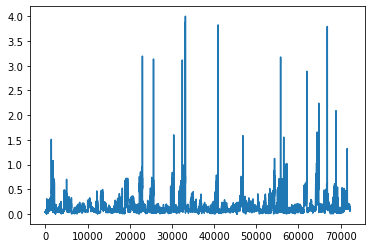

In [23]:

plt.plot(range(len(mask_pop1_mean)),mask_pop1_mean)

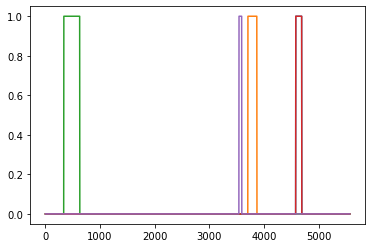

In [6]:
plt.plot(range(len(mask_pop1)),mask_pop1)
plt.plot(range(len(mask_pop2)),mask_pop2)
plt.plot(range(len(mask_pop3)),mask_pop3)
plt.plot(range(len(mask_pop4)),mask_pop4)
plt.plot(range(len(mask_pop5)),mask_pop5)

Which population statistically

b) seems to use more electrical heating in winter

In [51]:
mask2 = acorn["REFERENCE"] == "Rarely leave the heating on when out for a few hours" 
fin2 = acorn[mask2]
columny2 = fin2.columns[3:]
#zbieramy calą populację jako grupę która redukuje ilość zużytej energii elektrycznej tak żeby poznać kto tego nie robi

fin2=fin2.reset_index(drop = True)
odp_max = fin2[columny].transpose().idxmax()
odp_min = fin2[columny].transpose().idxmin()




In [52]:
str(odp_min[0])

'ACORN-A'

In [31]:
mask_acorn =  houses['Acorn'] == 'ACORN-O'

mask_b = houses[mask_acorn]

mask_b_mean = pd.merge(left = mask_b,right = daily, how = 'inner',on='LCLid')['energy_mean']
print(mask_b_mean.mean())

0.179033076550184


In [60]:

fin[12:17][['REFERENCE',str(odp_max[0])]]

,REFERENCE,ACORN-O
12,White,100.0
13,Mixed,104.0
14,Asian,102.0
15,Black,85.0
16,Other ethnicity,99.0


In [59]:
fin[12:17][['REFERENCE',str(odp_min[0])]]

,REFERENCE,ACORN-A
12,White,98.0
13,Mixed,117.0
14,Asian,107.0
15,Black,48.0
16,Other ethnicity,174.0
